[**Demo %s**](#demo-fp-spiral)

Let's convert the roots of a quadratic polynomial $f(x)$ to a fixed point problem.

In [2]:
using Polynomials
p = Polynomial([3.5, -4,1])
r = roots(p)
rmin, rmax = extrema(r)
@show rmin, rmax;

(rmin, rmax) = (1.2928932188134525, 2.7071067811865475)

We define $g(x)=x-p(x)$.

In [3]:
g(x) = x - p(x)

g (generic function with 1 method)

Intersections of $y=g(x)$ with the line $y=x$ are fixed points of $g$ and thus roots of $f$. (Only one is shown in the chosen plot range.)

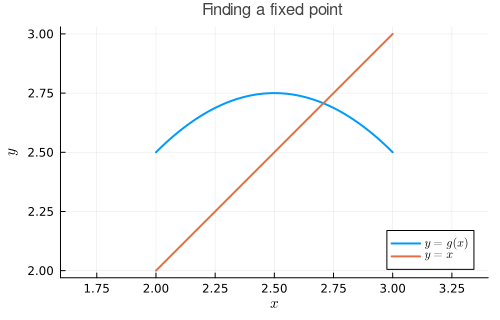

In [4]:
plt = plot([g x->x], 2, 3;
    l=2, label=[L"y=g(x)" L"y=x"],
    xlabel=L"x",  ylabel=L"y", 
    aspect_ratio=1,
    title="Finding a fixed point",  legend=:bottomright)

If we evaluate $g(2.1)$, we get a value of almost 2.6, so this is not a fixed point.

In [5]:
x = 2.1;
y = g(x)

2.59

However, $y=g(x)$ is considerably closer to the fixed point at around 2.7 than $x$ is. Suppose then that we adopt $y$ as our new $x$ value. Changing the $x$ coordinate in this way is the same as following a horizontal line over to the graph of $y=x$.

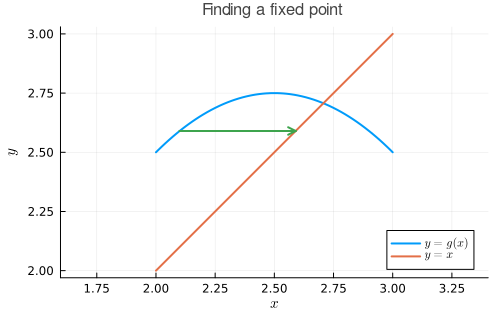

In [6]:
plot!([x, y], [y, y], arrow=true, color=3)

Now we can compute a new value for $y$. We leave $x$ alone here, so we travel along a vertical line to the graph of $g$.

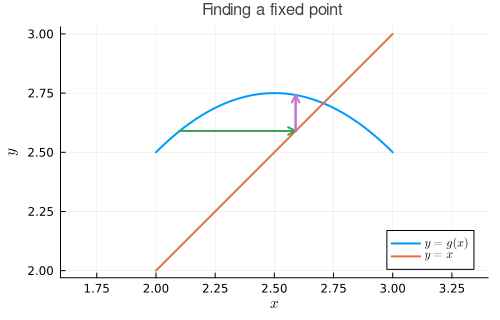

In [7]:
x = y;  y = g(x)
plot!([x, x], [x, y], arrow=true, color=4)

You see that we are in a position to repeat these steps as often as we like. Let's apply them a few times and see the result.

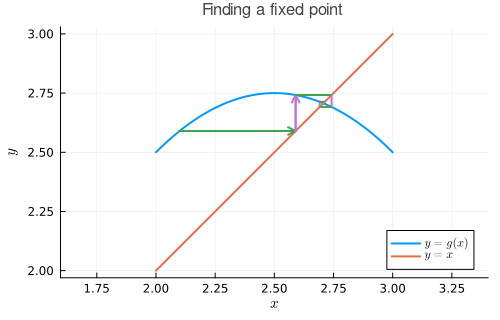

In [8]:
for k = 1:5
    plot!([x, y], [y, y], color=3);  
    x = y       # y becomes the new x
    y = g(x)    # g(x) becomes the new y
    plot!([x, x], [x, y], color=4)  
end
plt

The process spirals in beautifully toward the fixed point we seek. Our last estimate has almost 4 accurate digits.

In [9]:
abs(y - rmax) / rmax

0.0001653094344995643

Now let's try to find the other fixed point $\approx 1.29$ in the same way. We'll use 1.3 as a starting approximation.

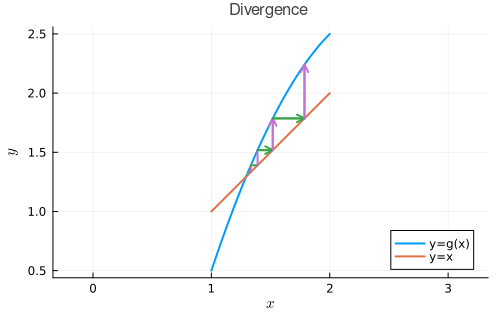

In [10]:
plt = plot([g x->x], 1, 2, l=2, label=["y=g(x)" "y=x"], aspect_ratio=1, 
    xlabel=L"x", ylabel=L"y", title="Divergence", legend=:bottomright)

x = 1.3; y = g(x);
arrow = false
for k = 1:5
    plot!([x, y], [y, y], arrow=arrow, color=3)  
    x = y       # y --> new x
    y = g(x)    # g(x) --> new y
    plot!([x, x], [x, y], arrow=arrow, color=4)
    if k > 2; arrow = true; end
end
plt

This time, the iteration is pushing us _away from_ the correct answer.